## Logistic Regression with SGD

To begin you first need to install all dependencies, using:

    pip install -r requirements.txt

In [214]:
import numpy as np
import matplotlib.pyplot as plt

from math import exp, log
import os
import pickle

from skimage import io
from skimage.color import rgb2gray
from skimage.feature import hog

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import random

In [215]:
%matplotlib inline

### load the dataset

In [216]:
### set your image dir here
IMAGE_DIR = "C:/Users/Srishti/Desktop/ml/hw3(1)/all/"

In [217]:
def load_dataset(subset="train"):
    """
    1. subset = "train", "val", "test"
    2. About the dataset: in "train","val" subset, the first half of images are images of hands, the rest half are images of not-hand. 
    3. extract features from HoG
    """
    path = os.path.join(IMAGE_DIR,subset)
    name_list = os.listdir(path)
    print("Number of images in {}-set: {}".format(subset, len(name_list)))
    #HoG returns 324 features
    X = np.zeros(shape=(len(name_list), 324))

    if subset == "train" or subset == "val":
        #Make sure that we have equal number of positive and negative class images
        assert len(name_list)%2 == 0
        count = len(name_list)//2
        y = np.array(count*[1] + count*[0])
        for idx_true in range(count):
            img_name = os.path.join(path,str(idx_true)+".png")
            img = io.imread(img_name)
            img = rgb2gray(img)
            vec = hog(img)
            X[idx_true, :] = vec
        
        for idx in range(count):
            idx_false = idx + count
            img_name = os.path.join(path,str(idx_false)+".png")
            img = io.imread(img_name)
            img = rgb2gray(img)
            vec = hog(img)
            X[idx_false, :] = vec
        return X, y        
    else:
        for idx in range(len(name_list)):
            img_name = os.path.join(path, str(idx)+".png")
            img = io.imread(img_name)
            img = rgb2gray(img)
            vec = hog(img)
            X[idx, :] = vec
        return X

### load the data

In [218]:
X_train, y_train = load_dataset("train")
X_val, y_val = load_dataset("val")
X_test = load_dataset("test")

Number of images in train-set: 8170


C:\Users\Srishti\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Number of images in val-set: 2724
Number of images in test-set: 5542


### displaying images

In [219]:
def display(img_path):
    """
    visualize the img
    """
    img = io.imread(img_path)
    print(img_path)
    io.imshow(img)
    io.show()

C:/Users/Srishti/Desktop/ml/hw3(1)/all/train/1.png


C:\Users\Srishti\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Srishti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


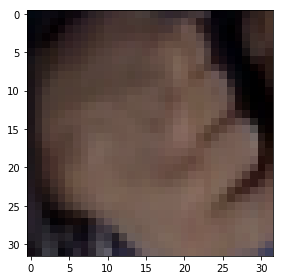

In [220]:
display(IMAGE_DIR+"train/1.png")

### Logistic regression

#### Main function in the class
1. \__init\__() which sets the hyper parameters
2. sigmoid()
3. __init_param(), initializes the parameters .
4. fit(): train the data
5. predict_proba(): predict the probability of the sample belonging to the positive class
6. predict(): classify the sample


Feel free to overlook the rest of the parts of the code, it's just for convenience.


In [221]:
class LogisticRegression:
    """
    Logistic Regression
    """
    def __init__(self, eta0=0.1, eta1=1, m=16, max_epoch=1000, delta=0.0001):
        """
        m is the batch_size
        """
        self.__init = True # whether to initial the parameters
        self.__eta0 = eta0
        self.__eta1 = eta1
        self.__delta = delta
        self.__m = m
        self.__max_epoch = max_epoch
        
    def sigmoid(self,x):
        return 1.0 / (1 + np.exp(-x))
    
    def __init_param(self):
        """
        Weights initialized using a normal distribution here: you can change the distribution.
        """
        d = self.__dimension
        np.random.randn(1,d)
        self.__wt =np.random.randn(1,d)

        #self.__wt = np.reshape(self.__wt,(1,d)) 

        self.__bias = np.random.randn()
        self.__bias=1
        return self.__wt,self.__bias
    
        
        return save
    def create_batch(self,i_n,m,X):
        for i in range(0,X.shape[0],m):
            #print (i_n[i:i+m])
            yield i_n[i:i+m]
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Recommended input:
        X: n x d array,
        y: n x 1 array or list
        """
        n, d = X.shape
        self.__dimension = d
        
        if self.__init:
            self.__init_param()
        
        ### write your code here ### 

        ############################
        x=np.transpose(X)
        #ybar=np.transpose(y)
        conc=np.ones(n)
        xbar=np.vstack([x,conc])
        #w=np.hstack([self.__wt,self.__bias])
        wbar=np.transpose(self.__wt)
        wbar=np.vstack([wbar,self.__bias])
        w=np.transpose(wbar)
        x_val=np.transpose(X_val)
        #ybar=np.transpose(y)
        conc_val=np.ones(X_val.shape[0])
        xbar_val=np.vstack([x_val,conc_val])
        sum1=0
        sum2=0
        sum3=0
        i_n=[]
        l_train=[]
        l_vali=[]
        acc_train=[]
        acc_valid=[]
        epoch=0
        l_old=0
        #print(i_n)
        
        
        
        for j in range(1,self.__max_epoch+1):
            #y=np.transpose(np.dot(w,xbar))
            #print(y)
            l_old1=np.dot(np.transpose(y),np.log(self.sigmoid(np.transpose(np.dot(w,xbar)))))
            #print(l_old1.shape)
            l_old0=np.log(1-(self.sigmoid(np.transpose(np.dot(w,xbar)))))
            yi=1-(np.transpose(y))
            l_old0=np.dot(yi,l_old0)
            #print(np.transpose(y))
            #print(yi)
            #print(l_old0)
            #print(self.sigmoid(np.transpose(np.dot(w,xbar))))
            #print(l_old0.shape)
            l_old= (l_old1+l_old0).sum()
            l_old = (l_old/n)* (-1)
            #print(l_old)
            eta=self.__eta0/(self.__eta1+ j)
            
            i_n=np.random.permutation(n)
            #print(i_n)
            #print(i_n)
            for batch in self.create_batch(i_n,self.__m,X):
                #print(batch)
               
                sum2=0
                for k in batch:
                    y1=np.matmul(w,xbar[:,k])
                    x_col=np.matrix((xbar[:,k]))
                    x_col=np.transpose(x_col)
                    sum2=np.add(np.matmul(x_col,np.matrix(y[k]-(self.sigmoid(y1)))),sum2)
                    #print(sum2)
                deltheta=np.transpose((sum2/len(batch))*-1)
                w= np.subtract(w,np.dot(eta,deltheta))
            l_new1=np.dot(np.transpose(y),np.log(self.sigmoid(np.transpose(np.dot(w,xbar)))))
            l_new0=np.log(1-(self.sigmoid(np.transpose(np.dot(w,xbar)))))
            yi=1-(np.transpose(y))
            l_new0=np.dot(yi,l_new0)
            l_new= (l_new1+l_new0).sum()
            l_new = (l_new/n)* (-1)
            l_train.append(l_new)
            l_val1=np.dot(np.transpose(y_val),np.log(self.sigmoid(np.transpose(np.dot(w,xbar_val)))))
            l_val0=np.log(1-(self.sigmoid(np.transpose(np.dot(w,xbar_val)))))
            yi_val=1-(np.transpose(y_val))
            l_val0=np.dot(yi_val,l_val0)
            l_val= (l_val1+l_val0).sum()
            l_val = (l_val/n)* (-1)
            l_vali.append(l_val)
            #print(l_new)
            epoch=epoch+1 
            ypred_train=self.predict(np.transpose(np.dot(w,xbar)))        
            #print(ypred_train)
            acc_train.append(accuracy_score(y,ypred_train))
            ypred_val=self.predict(np.transpose(np.dot(w,xbar_val)))
            acc_valid.append(accuracy_score(y_val,ypred_val))
            if(l_new>(1-self.__delta)*(l_old)):
                break
        #print(epoch)      
        return(l_train,epoch,w,l_vali,acc_train,acc_valid,ypred_val)
            
            
       
    
        
    
    def predict_proba(self, X):
        """
        predict the probility of the sample
        You can refer to my code below
        """
#         return a vector containing the probability values of the samples belonging to the positive class
    
    def predict(self, X):
        """
        Classify the sample
        """
#         return self.predict_proba(X) >= 0.5 # attention: this will give result in bool, you need to convert it to int for submission. 
        predictions=self.sigmoid(X)
        pred=[]
        for preds in predictions:
            if(preds>=0.5):
                pred.append(1)
            else:
                pred.append(0)
        return pred
    def get_param(self):
        """
        output:
            parameters: wt(1*d array), b(scalar)
        """
        return [self.__wt, self.__bias]
    
    def save_model(self, save_file):
        """
        save model to .pkl file
        """
        with open(save_file,"wb") as file:
            pickle.dump([self.__wt, self.__bias],file)

    def load_model(self, load_file):
        """
        load model from .pkl file
        """
        with open(load_file,"rb") as file:
            param = pickle.load(file)
        self.__wt = param[0]
        self.__bias = param[1]
        self.__init = False
        return self.__wt, self.__bias

## Question 2.3

### 1. Baseline Model

In [222]:
LR = LogisticRegression()


(a) Number of epochs till termination = 363

In [223]:
l1,epoch1,w1,lvalid,acc_train,acc_valid,ypred_val=LR.fit(X_train,y_train,X_val,y_val)
print("number of epochs till termination", epoch1)


number of epochs till termination 363


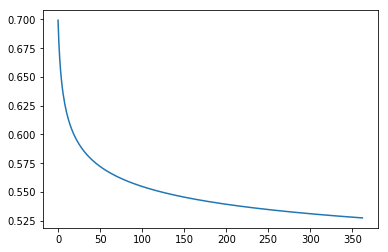

In [255]:
#print(l1)
#print(epoch1)
# (b) Plot L(theta) vs num_epoch
plt.plot(range(epoch1),l1)

In [225]:
print("final value of ltheta for training data ", l1[epoch1-1])
#print(lvalid[epoch1-1])

final value of ltheta for training data  0.5274465166335702


(c) Final value of L($\theta$) after optimization = 0.52744

### 2. Experimenting with ($\eta_0$,$\eta_1$)

In [245]:
# Experimentation code goes here
eta_0=[0.5,1.0,5,10,50,100]
eta_1=[5,10,50,100,500,1000]
min1=1000
for i in range(0,6):
    #print(eta_0[i])
    #print(eta_1[i])
    #eta_1=eta_0*10
    LR.__init__(eta0=eta_0[i],eta1=eta_1[i],m=16, max_epoch=1000, delta=0.0001)
    l_exp,epoch_exp,w_exp,lvalid_exp,acc_train_exp,acc_valid_exp,ypred_val_exp=LR.fit(X_train,y_train,X_val,y_val)
    if epoch_exp<min1:
        min1=epoch_exp
        final_eta0=eta_0[i]
        final_eta1=eta_1[i]
        final_ltheta=l_exp[min1-1]
        final_ltheta_list=l_exp

(a) Best value for, $\eta_0$ = 50, $\eta_1$ = 500

Number of epochs for training = 88

Final value of L($\theta$) = 0.308

In [246]:
print("Best value for eta0 and eta1 is : ",final_eta0," ", final_eta1)
print("Number of epochs for training ", min1)
print("Final value of ltheta ", final_ltheta)

Best value for eta0 and eta1 is :  50   500
Number of epochs for training  88
Final value of ltheta  0.308911744248917


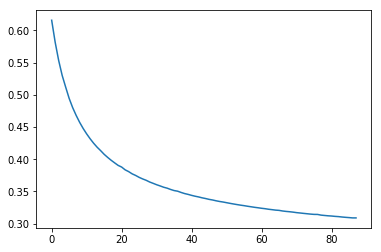

In [254]:
# (b) For best (eta_0, eta_1) plot L(theta) vs num_epochs
plt.plot(range(min1),final_ltheta_list)


### 3. Evaluating on validation set

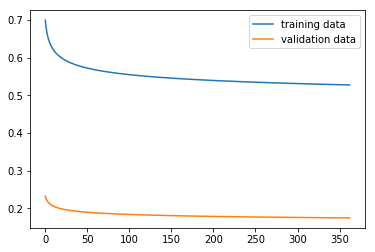

In [234]:
# (a) Plot L(theta) vs num_epochs for both training and validation set on the same figure
plt.plot(range(epoch1),l1,label="training data")    
plt.plot(range(epoch1),lvalid,label="validation data")
plt.legend()


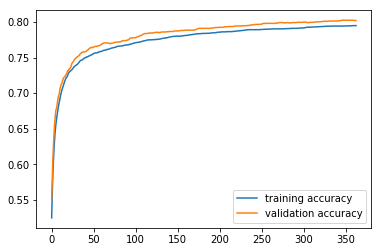

In [235]:
# (b) Plot Accuracy vs num_epochs for both training and validation set on the same figure
plt.plot(range(epoch1),acc_train,label='training accuracy')
plt.plot(range(epoch1),acc_valid,label='validation accuracy')
plt.legend()

### 4. ROC and Precision-Recall curves

area under curve  0.8021292217327459


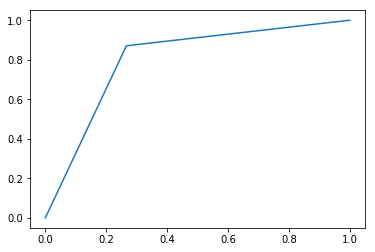

In [236]:
#(a) Plot ROC curve on validation data
fpr, tpr, _ = roc_curve(y_val,ypred_val)
plt.plot(fpr,tpr)
roc_auc = auc(fpr, tpr)
print("area under curve ", roc_auc)

Area under curve = 0.8021

[0.5        0.76565526 1.        ]


Text(0,0.5,'precision')

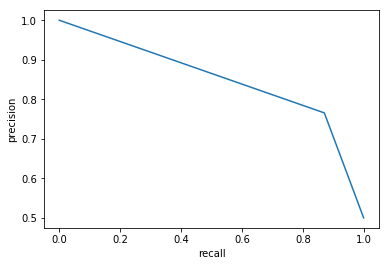

In [244]:
#(a) Plot Precision-Recall curve on validation data

precision, recall, threshholds = precision_recall_curve(y_val, ypred_val)

print(precision)

plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
#from sklearn.metrics import classification_report
#print(classification_report(y_val,ypred_val))

In [240]:
average_precision=average_precision_score(y_val, ypred_val)
print("average_precision is", average_precision)

average_precision is 0.7313268282601917


In [ ]:
Average Precision = 0.73

## Question 2.4

### 1. Submission

In [256]:
import pandas as pd
def submission(y_pred):
    """
    generate the submission.csv for kaggle
    input args:
        y_pred: 5542x1 array or list contains 5542 elements
        
    """
    save_file = pd.DataFrame(columns=["Id","Class"])
    id = np.array([idx for idx in range(5542)])
    save_file["Id"] = id
    save_file["Class"]= y_pred
    save_file.to_csv("C:/Users/Srishti/Desktop/ml/submission.csv",index=0)       

#### Generate the submission.csv

In [257]:
# code goes here
#print(acc_valid2[epoch2-1])
x_train_val= np.append(X_train,X_val,axis=0)
y_train_val=np.append(y_train,y_val,axis=0)
x_test=np.transpose(X_test)
conc_test=np.ones(X_test.shape[0])
xbartest=np.vstack([x_test,conc_test])
l2,epoch2,w2,lvalid2,acc_train2,acc_valid2,ypred_val2=LR.fit(x_train_val,y_train_val,X_val,y_val)
ypred=LR.predict(np.transpose(np.dot(w2,xbartest)))
submission(ypred)


Best obtained accuracy on Public Leader-board = 87.766 %